In [0]:
%tensorflow_version 2.x
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from tensorflow import keras
from tensorflow.keras import layers
import collections
import logging
logging.getLogger('googleapiclient.discovery_cache').setLevel(logging.ERROR)
plt.rc_context({'xtick.color':'w', 'ytick.color':'w', 'text.color':'w', 'axes.labelcolor':'w'})
from pydrive.auth import GoogleAuth 
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

!pip install -q keras

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

import pathlib

import collections
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import tensorflow_hub as hub
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from numpy import array
from numpy import hstack

import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_datasets as tfds
#import resources from tensorflow.python.ops 
#import tensor_forest from tensorflow.contrib.tensor_forest.python

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Bidirectional, LSTM, Dropout, Conv1D, MaxPooling1D, GRU

import numpy as np
import matplotlib.pylab as plt
import pandas as pd
import matplotlib.pyplot as plt
import math
import os
import sys
import shutil
import urllib.request
import zipfile
import warnings
import smtplib
import re
from datetime import datetime
from email.message import EmailMessage
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import RFE
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
from imblearn.combine import SMOTETomek

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import accuracy_score
#dark mode
plt.rc_context({'xtick.color':'w', 'ytick.color':'w', 'text.color':'w', 'axes.labelcolor':'w'})

print(tf.__version__)

2.2.0-rc2


In [0]:
drive.ListFile({'q': "'1EYL1Xky9v3LygcLztNjbxlpbc2RFmyon' in parents and trashed=false"}).GetList()
data_downloaded=drive.CreateFile({'id': '1AcUHDj2sdcehV5aTv-34GNc9Lo7_5-Tm'})
data_downloaded.GetContentFile('Metro_Interstate_Traffic_Volume.csv')

In [0]:
data=pd.read_csv('Metro_Interstate_Traffic_Volume.csv',low_memory=False, lineterminator='\n')
data.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume\r
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [0]:
df=data

i=df.holiday.size
cont=0
while(cont != i):
  if(df.holiday[cont] == 'None'):
    df.holiday[cont] = 1
  else:
    df.holiday[cont] = 0
  cont=cont+1

df['holiday']=df['holiday'].astype(str).astype(int)
df['weather_main'] = pd.Categorical(df['weather_main'])
df['weather_main'] = df.weather_main.cat.codes
df['weather_description'] = pd.Categorical(df['weather_description'])
df['weather_description'] = df.weather_description.cat.codes
df['date_time'] = pd.to_datetime(df.date_time)
df['weekday'] = df.date_time.dt.weekday
df['date'] = df.date_time.dt.date
df['hour'] = df.date_time.dt.hour
df['month'] = df.date_time.dt.month
df['year'] = df.date_time.dt.year

In [0]:
def hour_modify(x):
    Manana = [4,5,6,7,8,9,10,11]
    Tarde = [12,13,14,15,16,17,18,19]
    Noche = [20,21,22,23,24,1,2,3]
    if x >= 4 and x < 12:
        return 'Manana'
    elif  x >= 12 and x < 20:
        return 'Tarde'
    elif x >= 20 or x < 4:
        return 'Noche'
    
df['mtn'] = df.hour.map(hour_modify)

In [0]:
df.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume\r,weekday,date,hour,month,year,mtn
0,1,288.28,0.0,0.0,40,1,24,2012-10-02 09:00:00,5545,1,2012-10-02,9,10,2012,Manana
1,1,289.36,0.0,0.0,75,1,2,2012-10-02 10:00:00,4516,1,2012-10-02,10,10,2012,Manana
2,1,289.58,0.0,0.0,90,1,19,2012-10-02 11:00:00,4767,1,2012-10-02,11,10,2012,Manana
3,1,290.13,0.0,0.0,90,1,19,2012-10-02 12:00:00,5026,1,2012-10-02,12,10,2012,Tarde
4,1,291.14,0.0,0.0,75,1,2,2012-10-02 13:00:00,4918,1,2012-10-02,13,10,2012,Tarde


In [0]:
print(df.isnull().sum())

holiday                0
temp                   0
rain_1h                0
snow_1h                0
clouds_all             0
weather_main           0
weather_description    0
date_time              0
traffic_volume\r       0
weekday                0
date                   0
hour                   0
month                  0
year                   0
mtn                    0
dtype: int64


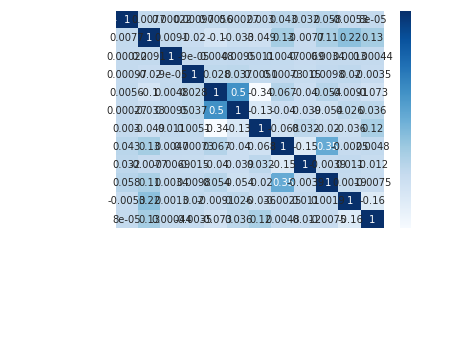

In [0]:
sns.heatmap(df.corr(), annot=True, cmap="Blues")
plt.show()

In [0]:
df.corr()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume\r,weekday,hour,month,year
holiday,1.000000,0.007713,0.000216,0.000969,0.005610,0.000268,0.002991,0.042897,0.032315,0.058461,-0.005343,0.000080
temp,0.007713,1.000000,0.009069,-0.019755,-0.101976,-0.033441,-0.049434,0.130299,-0.007708,0.112089,0.223738,0.134945
rain_1h,0.000216,0.009069,1.000000,-0.000090,0.004818,0.009535,0.010774,0.004714,-0.006920,0.003421,0.001298,0.000442
snow_1h,0.000969,-0.019755,-0.000090,1.000000,0.027931,0.036637,0.005101,0.000733,-0.014928,0.009849,0.020412,-0.003519
clouds_all,0.005610,-0.101976,0.004818,0.027931,1.000000,0.500745,-0.341891,0.067054,-0.039715,0.054418,-0.009133,-0.072861
weather_main,0.000268,-0.033441,0.009535,0.036637,0.500745,1.000000,-0.127549,-0.040151,-0.038688,-0.053622,0.026294,0.036396
weather_description,0.002991,-0.049434,0.010774,0.005101,-0.341891,-0.127549,1.000000,-0.067507,0.031892,-0.019637,-0.035943,0.119376
traffic_volume\r,0.042897,0.130299,0.004714,0.000733,0.067054,-0.040151,-0.067507,1.000000,-0.149544,0.352401,-0.002533,0.004753
weekday,0.032315,-0.007708,-0.006920,-0.014928,-0.039715,-0.038688,0.031892,-0.149544,1.000000,-0.003858,0.010741,-0.012313
hour,0.058461,0.112089,0.003421,0.009849,0.054418,-0.053622,-0.019637,0.352401,-0.003858,1.000000,0.001865,-0.007542


In [0]:
df = df[["holiday","temp", "clouds_all","hour","traffic_volume\r"]]

In [0]:
totCol = len(df.columns)
totAttr = totCol-1

In [0]:
targetCol = totCol
if targetCol == totCol:
    X_original = df.iloc[:,0:totAttr]
    y_original = df.iloc[:,totAttr]
else:
    X_original = df.iloc[:,1:totCol]
    y_original = df.iloc[:,0]

print("Xy_original.shape: {} X_original.shape: {} y_original.shape: {}".format(df.shape, X_original.shape, y_original.shape))

Xy_original.shape: (48204, 5) X_original.shape: (48204, 4) y_original.shape: (48204,)


In [0]:

dispCol = 4
if totAttr % dispCol == 0 :
    dispRow = totAttr // dispCol
else :
    dispRow = (totAttr // dispCol) + 1
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = dispCol*4
fig_size[1] = dispRow*4
plt.rcParams["figure.figsize"] = fig_size

In [0]:
X_original.head(10)

,holiday,temp,clouds_all,hour
0,1,288.28,40,9
1,1,289.36,75,10
2,1,289.58,90,11
3,1,290.13,90,12
4,1,291.14,75,13
5,1,291.72,1,14
6,1,293.17,1,15
7,1,293.86,1,16
8,1,294.14,20,17
9,1,293.10,20,18


In [0]:
# Descriptive statistics for each column
#train_dataset.describe()

In [0]:
#sns.pairplot(df, diag_kind="kde")

X_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   holiday     48204 non-null  int64  
 1   temp        48204 non-null  float64
 2   clouds_all  48204 non-null  int64  
 3   hour        48204 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 1.5 MB


In [0]:
X_original.describe()

,holiday,temp,clouds_all,hour
count,48204.000000,48204.000000,48204.000000,48204.000000
mean,0.998735,281.205870,49.362231,11.398162
std,0.035551,13.338232,39.015750,6.940238
min,0.000000,0.000000,0.000000,0.000000
25%,1.000000,272.160000,1.000000,5.000000
50%,1.000000,282.450000,64.000000,11.000000
75%,1.000000,291.806000,90.000000,17.000000
max,1.000000,310.070000,100.000000,23.000000


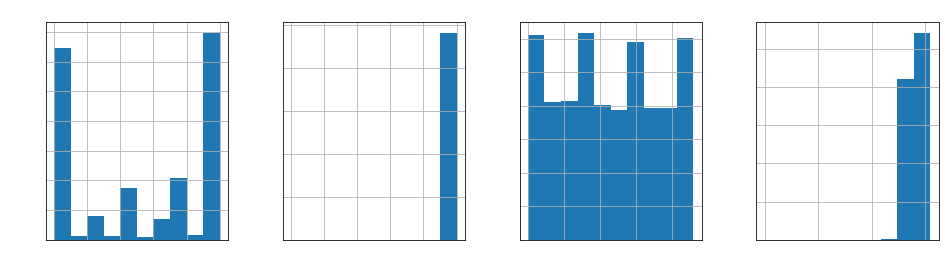

In [0]:
X_original.hist(layout=(dispRow,dispCol))
plt.show()

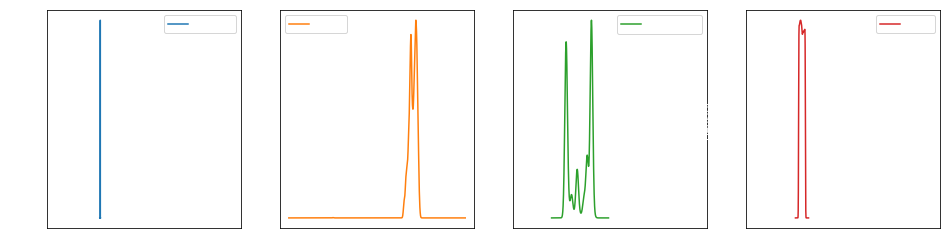

In [0]:
X_original.plot(kind='density', subplots=True, layout=(dispRow,4))
plt.show()

In [0]:
X_original = pd.get_dummies(X_original)
print(X_original.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   holiday     48204 non-null  int64  
 1   temp        48204 non-null  float64
 2   clouds_all  48204 non-null  int64  
 3   hour        48204 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 1.5 MB
None


In [0]:
seedNum = 888
testDataset_size = 0.25
X_train_df, X_test_df, y_train_df, y_test_df = train_test_split(X_original, y_original, test_size=testDataset_size, random_state=seedNum)
print("X_train_df.shape: {} y_train_df.shape: {}".format(X_train_df.shape, y_train_df.shape))
print("X_test_df.shape: {} y_test_df.shape: {}".format(X_test_df.shape, y_test_df.shape))

X_train_df.shape: (36153, 4) y_train_df.shape: (36153,)
X_test_df.shape: (12051, 4) y_test_df.shape: (12051,)


In [0]:
X_train = X_train_df.values
y_train = y_train_df.values
X_test = X_test_df.values
y_test = y_test_df.values
print("X_train.shape: {} y_train.shape: {}".format(X_train.shape, y_train.shape))
print("X_test.shape: {} y_test.shape: {}".format(X_test.shape, y_test.shape))

X_train.shape: (36153, 4) y_train.shape: (36153,)
X_test.shape: (12051, 4) y_test.shape: (12051,)


In [0]:
cpu_num = 6
# Set up Algorithms Spot-Checking Array
startTimeModule = datetime.now()
models = []
models.append(('LR', LinearRegression(n_jobs=cpu_num)))
models.append(('RR', Ridge(random_state=seedNum)))
models.append(('LASSO', Lasso(random_state=seedNum)))
models.append(('EN', ElasticNet(random_state=seedNum)))
models.append(('CART', DecisionTreeRegressor(random_state=seedNum)))
models.append(('KNN', KNeighborsRegressor(n_jobs=cpu_num)))
models.append(('RF', RandomForestRegressor(random_state=seedNum, n_jobs=cpu_num)))
models.append(('ET', ExtraTreesRegressor(random_state=seedNum, n_jobs=cpu_num)))
models.append(('GBM', GradientBoostingRegressor(random_state=seedNum)))
# models.append(('XGB', XGBRegressor(random_state=seedNum, n_jobs=cpu_num)))
results = []
names = []
metrics = []

In [0]:
num_folds = 10
scoring = 'neg_mean_squared_error'
# Generate model in turn
for name, model in models:
	
	startTimeModule = datetime.now()
	kfold = KFold(n_splits=num_folds, random_state=seedNum)
	cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	metrics.append(cv_results.mean())
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
	print ('Model training time:',(datetime.now() - startTimeModule))

print ('Average RMSE from all models:',math.sqrt(np.mean(metrics)*-1.0))
print ('Total training time for all models:',(datetime.now() - startTimeModule))

LR: -3407631.506755 (56387.928841)
Model training time: 0:00:00.085541
RR: -3407632.039512 (56394.121494)
Model training time: 0:00:00.069571
LASSO: -3408419.499942 (56471.095909)
Model training time: 0:00:00.061303
EN: -3409688.965949 (56323.414599)
Model training time: 0:00:00.058913
CART: -1325545.681211 (44647.197977)
Model training time: 0:00:01.149114
KNN: -981466.697779 (46326.813736)
Model training time: 0:00:04.058894
RF: -910721.912388 (36719.516591)
Model training time: 0:01:03.463557
ET: -1055378.362209 (38626.831499)
Model training time: 0:00:42.779462
GBM: -875989.726095 (35142.758159)
Model training time: 0:00:19.208236
Average RMSE from all models: 1444.625072153081
Total training time for all models: 0:00:19.209625


In [0]:
results = []
names = []

In [0]:
startTimeModule = datetime.now()
paramGrid1 = dict(n_estimators=np.array([100, 200, 300, 400, 500]))
model1 = RandomForestRegressor(n_jobs=cpu_num)
kfold = KFold(n_splits=num_folds, random_state=seedNum)
grid1 = GridSearchCV(estimator=model1, param_grid=paramGrid1, scoring=scoring, cv=kfold)
grid_result1 = grid1.fit(X_train, y_train)

print("Best: %f using %s" % (grid_result1.best_score_, grid_result1.best_params_))
results.append(grid_result1.cv_results_['mean_test_score'])
names.append('RF')
means = grid_result1.cv_results_['mean_test_score']
stds = grid_result1.cv_results_['std_test_score']
params = grid_result1.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
print ('Best RMSE for the Model is:', math.sqrt((grid_result1.best_score_*-1)))
print ('Model training time:',(datetime.now() - startTimeModule))

Best: -904776.739411 using {'n_estimators': 500}
-907520.205813 (35505.079098) with: {'n_estimators': 100}
-907802.707805 (35404.722444) with: {'n_estimators': 200}
-906544.498886 (37578.049189) with: {'n_estimators': 300}
-905969.403949 (35037.158052) with: {'n_estimators': 400}
-904776.739411 (36565.832659) with: {'n_estimators': 500}
Best RMSE for the Model is: 951.1975291235216
Model training time: 0:16:31.480575


In [0]:
startTimeModule = datetime.now()
paramGrid3 = dict(n_estimators=np.array([100, 200, 300, 400, 500]))
model3 = AdaBoostRegressor(base_estimator=None, n_estimators=50, learning_rate=1.0, loss='linear', random_state=None)
kfold3 = KFold(n_splits=num_folds, random_state=seedNum)
grid3 = GridSearchCV(estimator=model3, param_grid=paramGrid3, scoring=scoring, cv=kfold3)
grid_result3 = grid1.fit(X_train, y_train)

print("Best: %f using %s" % (grid_result3.best_score_, grid_result3.best_params_))
results.append(grid_result3.cv_results_['mean_test_score'])
names.append('RF')
means = grid_result3.cv_results_['mean_test_score']
stds = grid_result3.cv_results_['std_test_score']
params = grid_result3.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
print ('Best RMSE for the Model is:', math.sqrt((grid_result3.best_score_*-1)))
print ('Model training time:',(datetime.now() - startTimeModule))

Best: -904449.997830 using {'n_estimators': 500}
-911606.714757 (36504.238456) with: {'n_estimators': 100}
-907088.948562 (34696.855194) with: {'n_estimators': 200}
-905606.707697 (36793.218666) with: {'n_estimators': 300}
-905370.101586 (36145.889739) with: {'n_estimators': 400}
-904449.997830 (36708.851076) with: {'n_estimators': 500}
Best RMSE for the Model is: 951.025760865512
Model training time: 0:16:07.398491


In [0]:
startTimeModule = datetime.now()
paramGrid2 = dict(n_estimators=np.array([300, 400, 500, 600, 700]))
model2 = ExtraTreesRegressor(random_state=seedNum)
kfold = KFold(n_splits=num_folds, random_state=seedNum)
grid2 = GridSearchCV(estimator=model2, param_grid=paramGrid2, scoring=scoring, cv=kfold)
grid_result2 = grid2.fit(X_train, y_train)

print("Best: %f using %s" % (grid_result2.best_score_, grid_result2.best_params_))
results.append(grid_result2.cv_results_['mean_test_score'])
names.append('ET')
means = grid_result2.cv_results_['mean_test_score']
stds = grid_result2.cv_results_['std_test_score']
params = grid_result2.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
print ('Best RMSE for the Model is:', math.sqrt((grid_result2.best_score_*-1)))
print ('Model training time:',(datetime.now() - startTimeModule))

Best: -1053261.039823 using {'n_estimators': 400}
-1053397.724844 (39241.291240) with: {'n_estimators': 300}
-1053261.039823 (39476.260681) with: {'n_estimators': 400}
-1053490.944286 (39367.949292) with: {'n_estimators': 500}
-1053501.554534 (39162.367506) with: {'n_estimators': 600}
-1053624.530842 (39150.533881) with: {'n_estimators': 700}
Best RMSE for the Model is: 1026.2850675242685
Model training time: 0:15:38.840255


In [0]:
model1 = RandomForestRegressor(n_estimators=300, random_state=seedNum, n_jobs=cpu_num)
model1.fit(X_train, y_train)
predictions = model1.predict(X_test)
print('RMSE for the model is: ', math.sqrt(mean_squared_error(y_test, predictions)))
print('R2 for the model is: ', r2_score(y_test, predictions))

RMSE for the model is:  936.7821157071935
R2 for the model is:  0.7782637354497051


In [0]:
#model1.score( X_test, y_test, sample_weight=None)

0.778263735449705

In [0]:
model2 = ExtraTreesRegressor(n_estimators=700, random_state=seedNum, n_jobs=cpu_num)
model2.fit(X_train, y_train)
predictions = model2.predict(X_test)
print('RMSE for the model is: ', math.sqrt(mean_squared_error(y_test, predictions)))
print('R2 for the model is: ', r2_score(y_test, predictions))

RMSE for the model is:  1021.8676623609995
R2 for the model is:  0.7361550071060395


In [0]:
mode3 = AdaBoostRegressor(n_estimators=200, random_state=seedNum)
mode3.fit(X_train, y_train) 
predictions = mode3.predict(X_test)
print('RMSE for the model is: ', math.sqrt(mean_squared_error(y_test, predictions)))
print('R2 for the model is: ', r2_score(y_test, predictions))

RMSE for the model is:  1034.0750860052904
R2 for the model is:  0.7298134694105403
